In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
data = pd.read_csv('Q1.csv', index_col=0)
data.shape

(250, 31)

In [105]:
data_x = data.iloc[:,0:30]
data_y = data['Y']

In [109]:
from sklearn.linear_model import LogisticRegression
np.random.seed(20)
B = 500
C = 1000
n = 250
coefs = []
new_data_y = data_y
classifier = LogisticRegression(solver='liblinear', C=C, penalty='l1')
classifier.fit(data_x, data_y)
for i in range(B):
    x_boot = data_x
    p = classifier.predict_proba(x_boot)
    p = pd.DataFrame(p)
    new_data_y = np.random.binomial(1, p[1])
    new_classifier = LogisticRegression(solver='liblinear', C=C, penalty='l1')
    new_classifier.fit(x_boot, new_data_y)
    coefs.append(new_classifier.coef_[0])

In [110]:
coefs = np.array(coefs)
print(len(coefs))
print(len(coefs[0]))

500
30


[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]


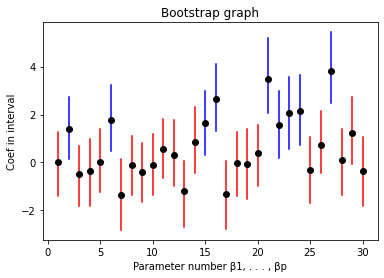

In [113]:
list_with_zero = []
for i in range(30):
    some_coef = np.sort(coefs[:,i])
    some_coef = some_coef[25:475]
    
    if (0 >= min(some_coef) and 0 <= max(some_coef)):
        color = 'r'
        list_with_zero.append(0)
    else:
        color = 'b'
        list_with_zero.append(1)
    
    plt.plot([i + 1,i + 1], [min(some_coef), max(some_coef)], color=color)
    plt.plot(i + 1, some_coef.mean(), 'o', color='black')

print(list_with_zero)

plt.xlabel("Parameter number β1, . . . , βp")
plt.ylabel("Coef in interval")
plt.title('Bootstrap graph')
plt.show()